In [1]:
!pip install split-folders

In [2]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 3. Create Keras data generators

In [4]:
datagen = ImageDataGenerator()

In [5]:
# define classes name
class_names = ['notinfected','infected']

In [6]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/sip/data/train/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 1389 images belonging to 2 classes.


In [7]:
# test data
test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/sip/data/test/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 616 images belonging to 2 classes.


### Step 3 - Build the model

The first step is to build the model, using **ResNet50**.

In [8]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [9]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='sigmoid')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [10]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=test_generator, epochs=epochs, batch_size=batch_size)

> Some warnings can appear, don't be afraid, you can execute the next steps of the notebook.

In [11]:
# launch the training
history = trainModel(model = model,epochs =3,optimizer ="Adam")

Epoch 1/3
44/44 [==============================] - 70s 516ms/step - loss: 0.0647 - accuracy: 0.9748 - val_loss: 9435.8408 - val_accuracy: 0.6234
Epoch 2/3
44/44 [==============================] - 18s 397ms/step - loss: 2.3538e-04 - accuracy: 1.0000 - val_loss: 105.1563 - val_accuracy: 0.3636
Epoch 3/3
44/44 [==============================] - 20s 458ms/step - loss: 4.0493e-05 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9789


- Display **loss** curves:

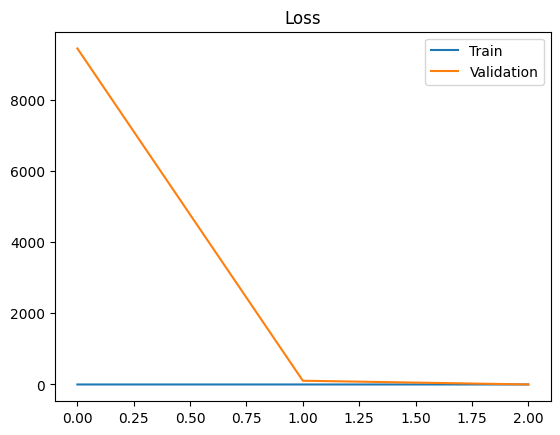

In [13]:
loss_train_curve = history.history["loss"]
loss_val_curve = history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

- Display **accuracy** curves:

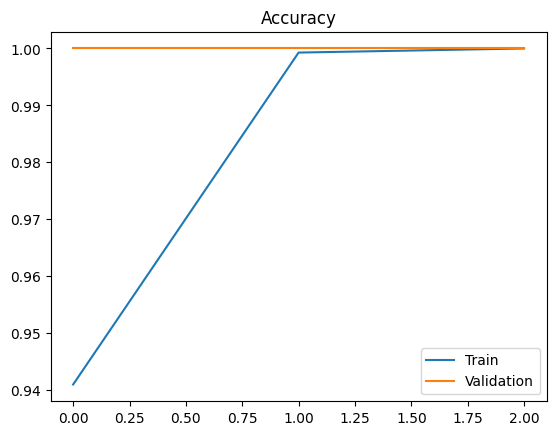

In [13]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

### Step 5 - Evaluate the model

The model is evaluated on test data.

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

20/20 [==============================] - 3s 146ms/step - loss: 0.2965 - accuracy: 0.9789
The test loss is:  0.2965375781059265
The best accuracy is:  97.88960814476013


In [ ]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [ ]:
# transform classes number into classes name
class_names[class_id.item()]

'infected'

### Step 7 - Save and export the model

>To save your model, you should create an other Object Storage container (with write rights) and mount it in your workspace (`saved_model` in this example).

You can now save your model in a dedicated folder.

In [ ]:
keras_file="reset(transferlearning).h5"
tf.keras.models.save_model(model,keras_file)

C:\Users\saiteja\AppData\Local\Temp\ipykernel_12756\172690898.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,keras_file)


## Conclusion

**Transfer Learning** saves time by achieving better performance in fewer epochs.

Train and test this model on your own dataset !